# 1 - Plot Student's T Distribution

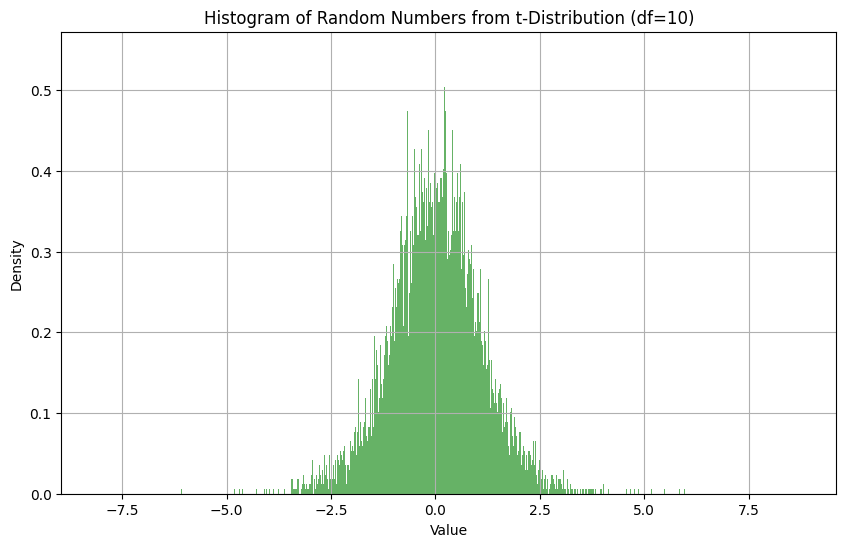

In [1]:
import numpy as np
import matplotlib.pyplot as plt

random_numbers = np.random.standard_t(df=10, size=500000)

plt.figure(figsize=(10, 6))
plt.hist(random_numbers, bins=50000, density=True, alpha=0.6, color='g')
plt.title('Histogram of Random Numbers from t-Distribution (df=10)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid()
plt.show()

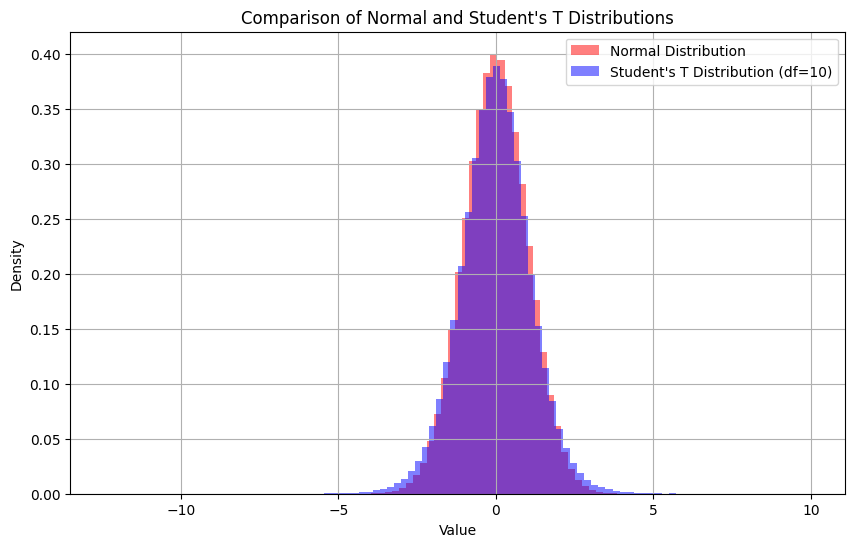

In [2]:
# Generate values with normal distribution
normal_random_numbers = np.random.normal(loc=0, scale=1, size=500000)

# Generate values with Student's T distribution
student_t_random_numbers = np.random.standard_t(df=10, size=500000)

# Plot histograms
min_value = min(np.min(normal_random_numbers), np.min(student_t_random_numbers))
max_value = max(np.max(normal_random_numbers), np.max(student_t_random_numbers))
bins = (max_value - min_value) / 100
bin_normal = np.arange(min(normal_random_numbers), max(normal_random_numbers) + bins, bins)
bin_student_t = np.arange(min(student_t_random_numbers), max(student_t_random_numbers) + bins, bins)

plt.figure(figsize=(10, 6))
plt.hist(normal_random_numbers, bins=bin_normal, density=True, alpha=0.5, label='Normal Distribution', color='red')
plt.hist(student_t_random_numbers, bins=bin_student_t, density=True, alpha=0.5, label="Student's T Distribution (df=10)", color='blue')
plt.title('Comparison of Normal and Student\'s T Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# 2 - Synthetic prices using the Student's T Distribution

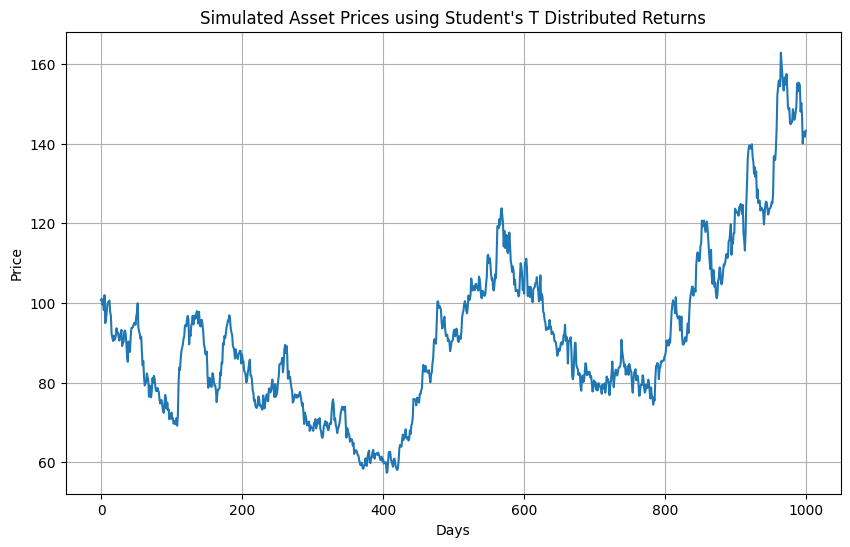

In [4]:
# Parameters for synthetic price series
mu = 0.0005      # Mean daily return
sigma = 0.02     # Standard deviation of daily returns
size = 1000      # Number of trading days
start_price = 100  # Starting price of the asset
df = 10          # Degrees of freedom for Student's T distribution

# Simulate daily returns using Student's T distribution
student_t_returns = np.random.standard_t(df=df, size=size) * sigma + mu
prices = start_price * np.exp(np.cumsum(student_t_returns))

# Plot the simulated price series
plt.figure(figsize=(10, 6))
plt.plot(prices)
plt.title("Simulated Asset Prices using Student's T Distributed Returns")
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid()
plt.show()

# 3 - Compare generated prices log-student vs log-normal

## 3.1 - Prices Curves

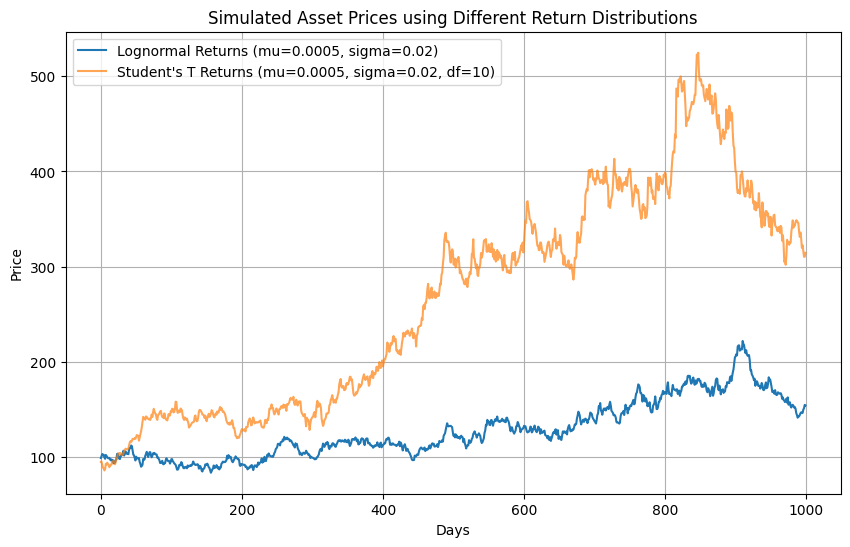

In [7]:
# Parameters for synthetic price series
mu = 0.0005      # Mean log-returns
sigma = 0.02     # Standard deviation of log-returns
size = 1000      # Number of trading days
start_price = 100  # Starting price of the asset
df = 10          # Degrees of freedom for Student's T distribution

# Simulate log-returns using Lognormal distribution
lognormal_returns = np.random.lognormal(mean=mu, sigma=sigma, size=size)
prices_lognormal = start_price * np.cumprod(lognormal_returns)

# Simulate log-returns using Student's T distribution
student_t_returns = np.random.standard_t(df=df, size=size) * sigma + mu
prices_student_t = start_price * np.exp(np.cumsum(student_t_returns))

# Plot the simulated price series
plt.figure(figsize=(10, 6))
plt.plot(prices_lognormal, label=f'Lognormal Returns (mu={mu}, sigma={sigma})')
plt.plot(prices_student_t, label=f'Student\'s T Returns (mu={mu}, sigma={sigma}, df={df})', alpha=0.7)
plt.title("Simulated Asset Prices using Different Return Distributions")
plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid()
plt.show()

## 3.2 - Price height comparison

In [10]:
# Parameters for synthetic price series
mu = 0.0005      # Mean log-returns
sigma = 0.02     # Standard deviation of log-returns
size = 1000      # Number of trading days
start_price = 100  # Starting price of the asset
df = 10          # Degrees of freedom for Student's T distribution

trials = 1000    # Number of trials for averaging
count = 0 # Counter for prices higher than lognormal

for _ in range(trials):
    # Simulate log-returns using Lognormal distribution
    lognormal_returns = np.random.lognormal(mean=mu, sigma=sigma, size=size)
    prices_lognormal = start_price * np.cumprod(lognormal_returns)

    # Simulate log-returns using Student's T distribution
    student_t_returns = np.random.standard_t(df=df, size=size) * sigma + mu
    prices_student_t = start_price * np.exp(np.cumsum(student_t_returns))

    # Compare final prices
    if prices_student_t[-1] > prices_lognormal[-1]:
        count += 1

print(f"Student's T distribution produced is greater than differences of prices Log-Normal distribution in {count} out of {trials} trials.")

Student's T distribution produced is greater than differences of prices Log-Normal distribution in 491 out of 1000 trials.


## 3.3 - Price volatility comparison

In [13]:
# Parameters for synthetic price series
mu = 0.0005      # Mean log-returns
sigma = 0.02     # Standard deviation of log-returns
size = 1000      # Number of trading days
start_price = 100  # Starting price of the asset
df = 10          # Degrees of freedom for Student's T distribution

trials = 1000    # Number of trials for averaging
count = 0 # Counter for prices higher than lognormal

for _ in range(trials):
    # Simulate log-returns using Lognormal distribution
    lognormal_returns = np.random.lognormal(mean=mu, sigma=sigma, size=size)
    prices_lognormal = start_price * np.cumprod(lognormal_returns)

    # Simulate log-returns using Student's T distribution
    student_t_returns = np.random.standard_t(df=df, size=size) * sigma + mu
    prices_student_t = start_price * np.exp(np.cumsum(student_t_returns))

    # Comparate the differences of prices
    def compute_average_differences(series):
        return np.mean([abs(series[i] - series[i - 1]) for i in range(1, len(series))])

    if compute_average_differences(prices_student_t) > compute_average_differences(prices_lognormal):
        count += 1

print(f"Student's T distribution produced is greater than differences of prices Log-Normal distribution in {count} out of {trials} trials.")

Student's T distribution produced is greater than differences of prices Log-Normal distribution in 580 out of 1000 trials.
